![House Prices](https://kaggle2.blob.core.windows.net/competitions/kaggle/5407/media/housesbanner.png)

# House Prices: Advanced Regression Techniques


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#fe">Feature Engineering</a></li>
<li><a href="#modeling">Modeling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Some description of the competition based on: 

>Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

>With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# check use in https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
from scipy import stats 
from scipy.stats import norm, skew

# check use in https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
from sklearn.preprocessing import StandardScaler

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# import data and check first few lines
df_train = pd.read_csv('C:/Users/joaon/Documents/Method Data Science/data/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# number of rows and columns of our dataframe
df_train.shape

(1460, 81)

In [4]:
# check some details about our dataframe with the .info() method
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# summary statistics (we have 38 numerical columns)
pd.set_option("display.max_columns",40)
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# missing values
df_train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

# ?

> there are some missing values: what's the best strategy to deal with them?

> check this kernel: https://www.kaggle.com/dansbecker/handling-missing-values


### Data Cleaning

In [7]:
# adapted from https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

n_missing = df_train.isnull().sum().sort_values(ascending=False)
percent_missing = (df_train.isnull().sum()/len(df_train)).sort_values(ascending=False)

missing_values = pd.concat([n_missing, percent_missing], axis=1, keys=['n', '%'])
missing_values.head(10)

,n,%
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [8]:
# dropping features with >50% of the values missing
df_train = df_train.drop((missing_values[missing_values['%'] > 0.5]).index, axis = 1)

In [9]:
# dataframe after dropping these features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [10]:
# missing values
df_train.isnull().sum().sort_values(ascending=False)

# the remaining missing values will be imputed at a later stage

FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
RoofMatl           0
RoofStyle          0
SalePrice          0
Exterior1st        0
Exterior2nd        0
YearBuilt          0
ExterQual          0
ExterCond          0
Foundation         0
YearRemodAdd       0
BldgType           0
OverallCond        0
OverallQual        0
HouseStyle         0
Condition2         0
                ... 
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
3SsnPorch          0
BsmtUnfSF          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr 

# ?
 
> should we manually standardize/normalize data?

<a id='eda'></a>
## Exploratory Data Analysis

### Univariate Analysis 

In [11]:
# columns labels
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

C:\Users\joaon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


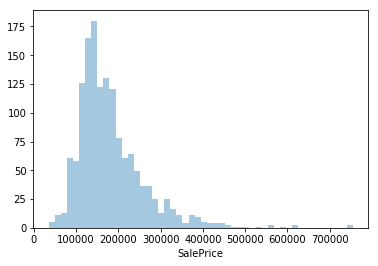

In [12]:
# histogram of dependent variable SalePrice
sns.distplot(df_train['SalePrice'], kde = False, bins = 50);

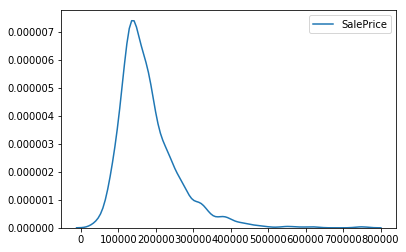

In [13]:
# kernel density estimation of dependent variable SalePrice
sns.kdeplot(df_train['SalePrice']);

C:\Users\joaon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


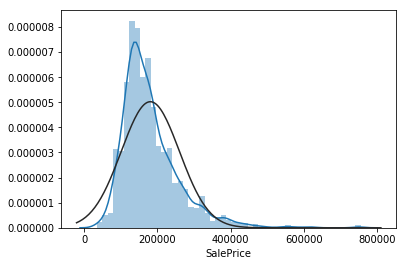

In [14]:
# distribution plot of dependent variable SalePrice with normal distribution fit
sns.distplot(df_train['SalePrice'] , fit = norm);

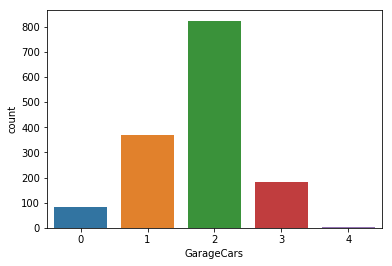

In [15]:
# countplot of independet variable GarageCars
sns.countplot(df_train['GarageCars']);

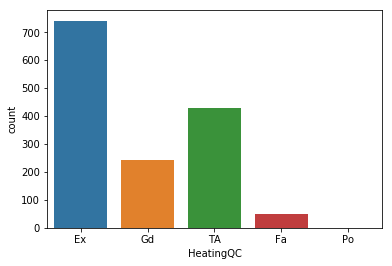

In [16]:
# countplot of independet variable HeatingQC
sns.countplot(df_train['HeatingQC']);

### Bivariate Analysis 

In [17]:
#correlation between the dependet variable SalePrice and all the other variables
df_train.corrwith(df_train.SalePrice).sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float

> As expected, there's a **very strong positive correlation** between **OverallQual** and **GrLivArea** with **SalePrice**. There's also a **strong positive correlation** between **GarageCars**, **GarageArea**, **TotalBsmtSF**, **1stFlrSF** and **FullBath** with **SalePrice**. On the other end of the spectrum, there's a somewhat important **negative correlation** between **EnclosedPorch** and **KitchenAbvGr** and **SalePrice**.

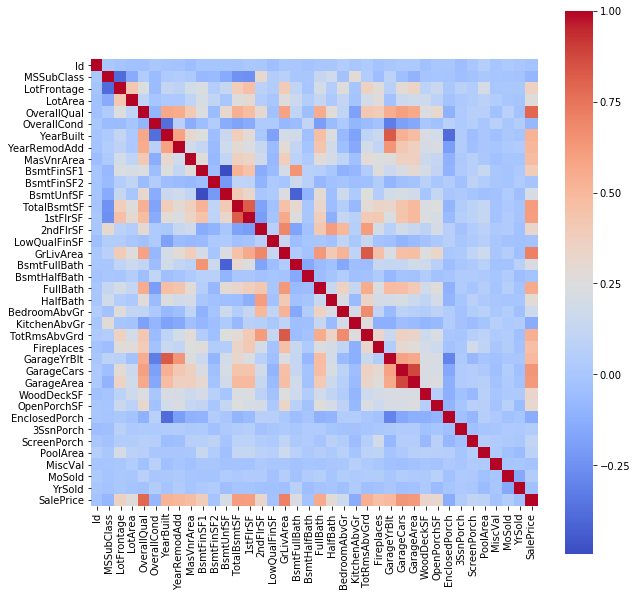

In [18]:
# heatmap with all the variables
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), square = True, cmap = "coolwarm");

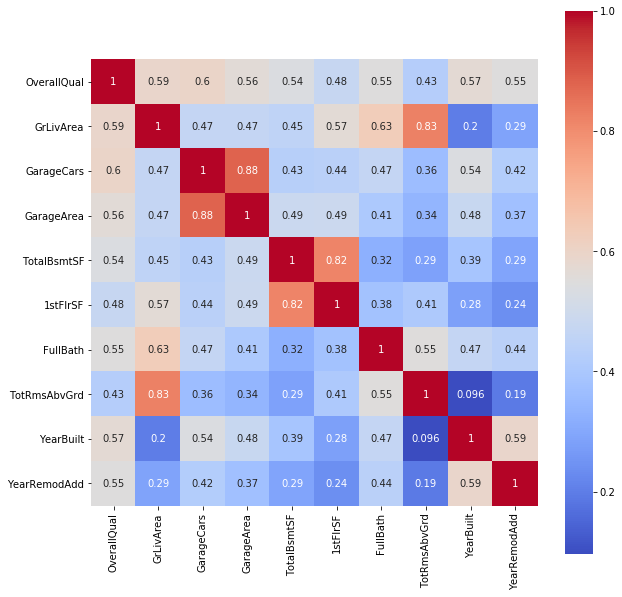

In [19]:
# heatmap for variables with an abs(correlation) > 0.5  with SalePrice
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
plt.figure(figsize=(10,10))
sns.heatmap(df_train[features].corr(), annot = True, square = True, cmap = "coolwarm");

> There's a very strong correlation between **GarageCars and GarageArea**, which is natural. There's also a very strong correlation between **TotalBsmtSF and 1stFlrSF** and between **TotRmsAbvGrd and GrLivArea**. We should have this in mind when building our model due to multicollinearity effects.

In [20]:
# from the features selected before, let's exclude GarageArea, 1stFlrSf and TotalRmsAbvGrd
# and include SalePrice
variables = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

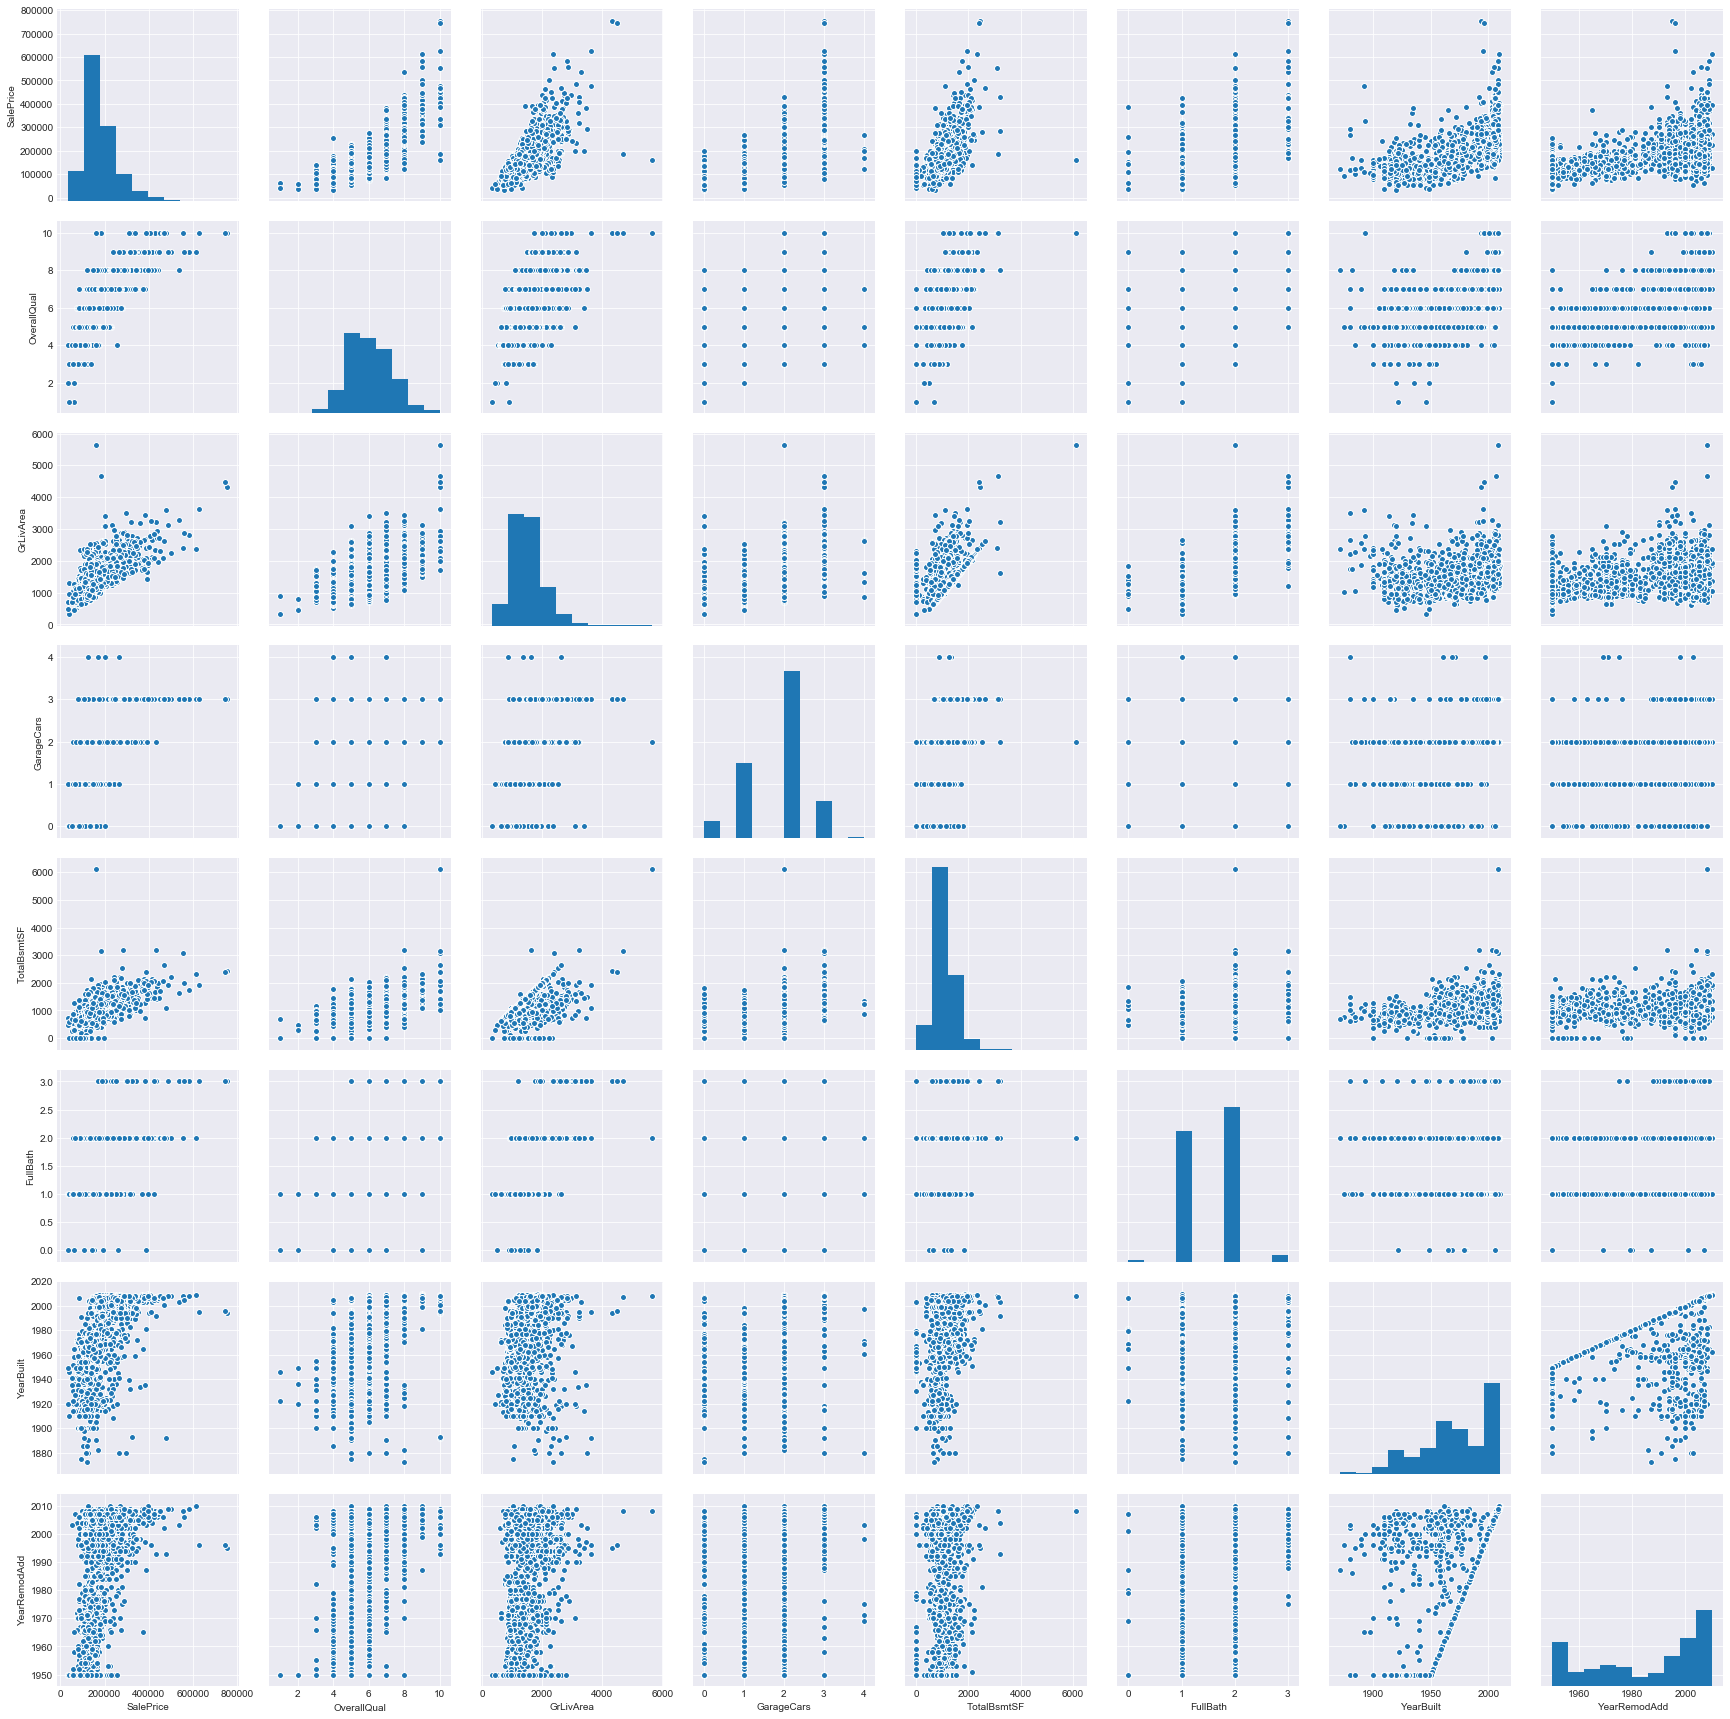

In [21]:
# pair plots for these variables
sns.set_style('darkgrid')
sns.pairplot(df_train[variables], size = 3);

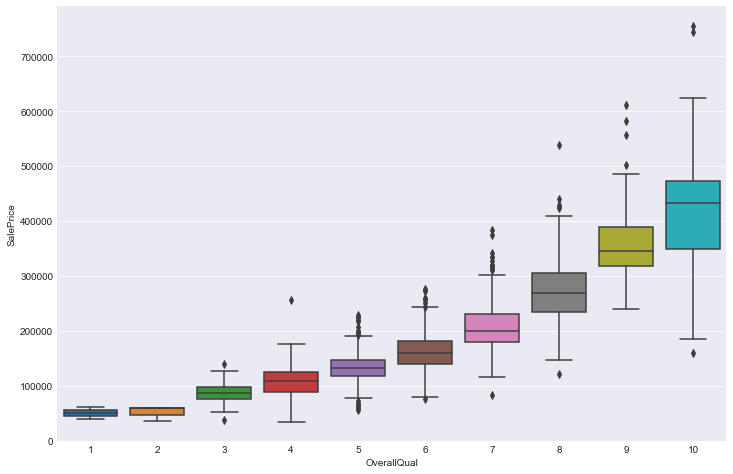

In [22]:
# box plot
plt.figure(figsize=(12,8))
sns.boxplot(x='OverallQual', y="SalePrice", data=df_train);

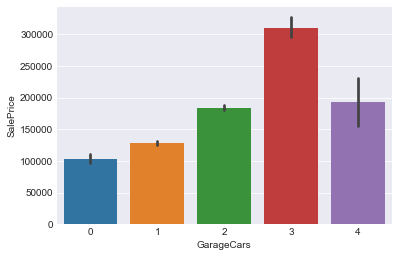

In [23]:
# bar plot
sns.barplot(x = 'GarageCars', y = 'SalePrice', data = df_train);

C:\Users\joaon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


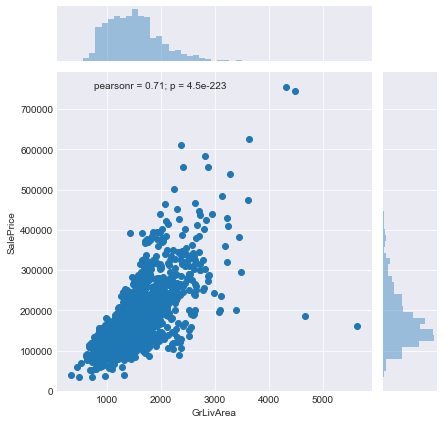

In [24]:
#scatter plot
sns.jointplot(x = 'GrLivArea', y = 'SalePrice', data = df_train);

# ?

some of these values seem to be **outliers**: check the best way to deal with them

### Multivariate Analysis 

In [25]:
df_train.sort_values(by = 'SalePrice', ascending = False)['SalePrice'].head()

691     755000
1182    745000
1169    625000
898     611657
803     582933
Name: SalePrice, dtype: int64

In [26]:
df_train.sort_values(by = 'GrLivArea', ascending = False)['GrLivArea'].head()

1298    5642
523     4676
1182    4476
691     4316
1169    3627
Name: GrLivArea, dtype: int64

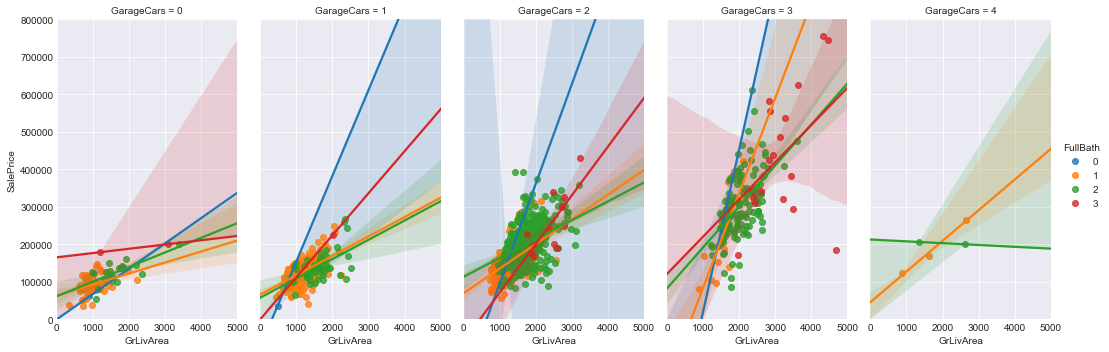

In [27]:
g = sns.lmplot(x = 'GrLivArea', y = 'SalePrice', data = df_train, col = 'GarageCars', hue = 'FullBath', 
               aspect = 0.6, size = 5)
g.set(xlim = (0, 5000))
g.set(ylim = (0, 800000));

### Outliers

In [28]:
# detecting outliers

#numeric_columns = df_train.select_dtypes(['number']).columns
#df_train_num = df_train[numeric_columns]
#df_train_num[np.abs(stats.zscore(df_train_num['GrLivArea'])) > 3].sort_values(by = 'SalePrice', ascending = False)

#df_train[variables][np.abs(stats.zscore(df_train[variables]['GrLivArea'])) > 3].sort_values(by = 'SalePrice', ascending = False)

#detecting only extreme outliers (z > 5)
z = np.abs(stats.zscore(df_train[variables]))
df_train[variables][(z > 5).any(axis=1)].sort_values(by = 'SalePrice', ascending = False)

#df_train[variables][np.abs(stats.zscore(df_train[variables]['TotalBsmtSF'])) > 5]


,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd
691,755000,10,4316,3,2444,3,1994,1995
1182,745000,10,4476,3,2396,3,1996,1996
1169,625000,10,3627,3,1930,3,1995,1996
898,611657,9,2364,3,2330,2,2009,2010
803,582933,9,2822,3,1734,3,2008,2009
523,184750,10,4676,3,3138,3,2007,2008
1298,160000,10,5642,2,6110,2,2008,2008


### Imputing missing values

In [29]:
# features that still have missing values
n_missing = df_train.isnull().sum().sort_values(ascending=False)

n_missing[n_missing > 0]

FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

In [30]:
# NA means no fireplace
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('None')
df_train['FireplaceQu'].value_counts()

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [31]:
# LotFrontage
df_train.groupby('Neighborhood')['LotFrontage'].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [32]:
# LotFrontage median seems to change considerably from neighborhood to neighborhood
# we will impute the median by neighborhood 

df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [33]:
# NA means no Garage

garage_categorical = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for cat in garage_categorical:
    df_train[cat] = df_train[cat].fillna('None')
    print(df_train[cat].value_counts())

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64
TA      1311
None      81
Fa        48
Gd        14
Po         3
Ex         3
Name: GarageQual, dtype: int64
TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64


In [34]:
# missing values for GarageYrBlt: impute 0
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)

In [35]:
# NA means no Basement

basement_categorical = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual']

for cat in basement_categorical:
    df_train[cat] = df_train[cat].fillna('None')
    print(df_train[cat].value_counts())

No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64
Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64
Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64
TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64
TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64


In [36]:
# NA means no masonry
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')
df_train['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [37]:
# missing values for MasVnrArea: impute 0
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)

In [38]:
# Electrical
df_train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [39]:
df_train['Electrical'].mode()[0]

'SBrkr'

In [40]:
#Standard Circuit Breakers & Romex is by far the most used system
# let's use mode for imputation

df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])
df_train['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [41]:
# check if there are any more missing values
df_train.isnull().sum().sort_values(ascending=False)

SalePrice        0
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
TotalBsmtSF      0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
                ..
WoodDeckSF       0
EnclosedPorch    0
HeatingQC        0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath

<a id='fe'></a>
## Feature Engineering

### Feature Transformation

C:\Users\joaon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


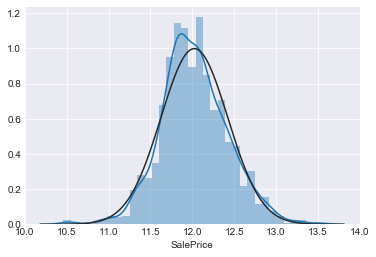

In [42]:
# log transform SalePrice
df_train['SalePrice'] = np.log(df_train['SalePrice'])

# check new distribution 
sns.distplot(df_train['SalePrice'] , fit = norm);

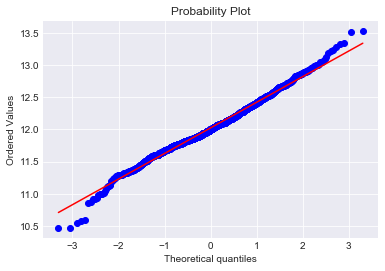

In [43]:
# QQ plot
stats.probplot(df_train['SalePrice'], plot = plt);

### Feature Selection

#### Encoding Categorical and Ordinal Variables

In [44]:
df_train.select_dtypes(['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [45]:
df_train.select_dtypes(['object']).nunique().sort_values(ascending = False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
Condition2        8
HouseStyle        8
RoofMatl          8
BsmtFinType2      7
GarageType        7
Functional        7
BsmtFinType1      7
SaleCondition     6
RoofStyle         6
Foundation        6
Heating           6
GarageCond        6
GarageQual        6
FireplaceQu       6
Electrical        5
LotConfig         5
BldgType          5
BsmtExposure      5
MSZoning          5
ExterCond         5
HeatingQC         5
BsmtQual          5
BsmtCond          5
KitchenQual       4
MasVnrType        4
ExterQual         4
LandContour       4
LotShape          4
GarageFinish      4
PavedDrive        3
LandSlope         3
CentralAir        2
Utilities         2
Street            2
dtype: int64

In [46]:
# ordinal features
ordinal_columns = ['BsmtFinType2', 'BsmtFinType1', 'GarageCond', 'GarageQual', 'FireplaceQu', 'BsmtExposure', 'ExterCond', 'HeatingQC', 'BsmtQual', 'BsmtCond', 'KitchenQual', 'ExterQual', 'GarageFinish', 'PavedDrive']

# Utilities could also be considered an ordinal feature
# but since it takes only 2 unique values we can treat it as categorical

In [47]:
#categorical features
categorical_columns = df_train.select_dtypes(['object']).columns.tolist()

for col in ordinal_columns:
    categorical_columns.remove(col)

categorical_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'SaleType',
 'SaleCondition']

In [48]:
# categories for each ordinal feature

for col in ordinal_columns:
    print(col + ", categories: ", df_train[col].unique())

BsmtFinType2, categories:  ['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtFinType1, categories:  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']
GarageCond, categories:  ['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']
GarageQual, categories:  ['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
FireplaceQu, categories:  ['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
BsmtExposure, categories:  ['No' 'Gd' 'Mn' 'Av' 'None']
ExterCond, categories:  ['TA' 'Gd' 'Fa' 'Po' 'Ex']
HeatingQC, categories:  ['Ex' 'Gd' 'TA' 'Fa' 'Po']
BsmtQual, categories:  ['Gd' 'TA' 'Ex' 'None' 'Fa']
BsmtCond, categories:  ['TA' 'Gd' 'None' 'Fa' 'Po']
KitchenQual, categories:  ['Gd' 'TA' 'Ex' 'Fa']
ExterQual, categories:  ['Gd' 'TA' 'Ex' 'Fa']
GarageFinish, categories:  ['RFn' 'Unf' 'Fin' 'None']
PavedDrive, categories:  ['Y' 'N' 'P']


In [49]:
# encoding ordinal features

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
cat = [['None', 0], ['Unf', 1], ['LwQ', 2], ['Rec', 3], ['BLQ', 4], ['ALQ', 5], ['GLQ', 6]]
ord_enc.fit(cat)

df_train['BsmtFinType2'] = ord_enc.transform(df_train['BsmtFinType2'].values.reshape(-1, 1))
df_train['BsmtFinType1'] = ord_enc.transform(df_train['BsmtFinType1'].values.reshape(-1, 1))


ord_enc = OrdinalEncoder()
cat = [['None', 0], ['Po', 1], ['Fa', 2], ['TA', 3], ['Gd', 4], ['Ex', 5]]
ord_enc.fit(cat)

df_train['GarageCond'] = ord_enc.transform(df_train['GarageCond'].values.reshape(-1, 1))
df_train['GarageQual'] = ord_enc.transform(df_train['GarageQual'].values.reshape(-1, 1))
df_train['FireplaceQu'] = ord_enc.transform(df_train['FireplaceQu'].values.reshape(-1, 1))
df_train['ExterCond'] = ord_enc.transform(df_train['ExterCond'].values.reshape(-1, 1))
df_train['HeatingQC'] = ord_enc.transform(df_train['HeatingQC'].values.reshape(-1, 1))
df_train['BsmtQual'] = ord_enc.transform(df_train['BsmtQual'].values.reshape(-1, 1))
df_train['BsmtCond'] = ord_enc.transform(df_train['BsmtCond'].values.reshape(-1, 1))
df_train['KitchenQual'] = ord_enc.transform(df_train['KitchenQual'].values.reshape(-1, 1))
df_train['ExterQual'] = ord_enc.transform(df_train['ExterQual'].values.reshape(-1, 1))


ord_enc = OrdinalEncoder()
cat = [['None', 0], ['No', 1], ['Mn', 2], ['Av', 3], ['Gd', 4]]
ord_enc.fit(cat)

df_train['BsmtExposure'] = ord_enc.transform(df_train['BsmtExposure'].values.reshape(-1, 1))


ord_enc = OrdinalEncoder()
cat = [['None', 0], ['Unf', 1], ['RFn', 2], ['Fin', 3]]
ord_enc.fit(cat)

df_train['GarageFinish'] = ord_enc.transform(df_train['GarageFinish'].values.reshape(-1, 1))


ord_enc = OrdinalEncoder()
cat = [['N', 0], ['P', 1], ['Y', 2]]
ord_enc.fit(cat)

df_train['PavedDrive'] = ord_enc.transform(df_train['PavedDrive'].values.reshape(-1, 1))

In [127]:
# encoding categorical features with sklearn's LabelEncoder

# encode categorical features with values between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()

for col in categorical_columns:
    lbl.fit(df_train[col].values.tolist())
    df_train[col] = lbl.transform(df_train[col].values.tolist())
    
df_train[categorical_columns].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,1,1,4,6,1,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,1,1,1,4,6,1,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,1,1,4,6,1,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,0,1,1,4,6,5,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,1,1,4,6,1,8,4


In [124]:
# or use Pandas's factorize()

#for col in categorical_columns:
    #df_draft[col], categories = df_draft[col].factorize()

#df_draft[categorical_columns].head()

In [125]:
# encoding categorical features with sklearn's OneHotEncoder

# encode categorical integer features as a one-hot numeric array

#from sklearn.preprocessing import OneHotEncoder

#hot_enc = OneHotEncoder(categories = 'auto')

#for col in categorical_columns:
    #hot_enc.fit(df_draft[col].values.reshape(-1, 1))
    #df_draft[col] = hot_enc.transform(df_draft[col].values.reshape(-1, 1))
    
#df_draft[categorical_columns].head()

#can we use these features like this in the model building phase?
#I am not sure about this step:
#df_draft[col] = hot_enc.transform(df_draft[col].values.reshape(-1, 1))
#how can we add the new dummy variables to the dataframe as different columns?

#Let's use pd.get_dummies() instead

In [128]:
# encoding categorical features with Pandas' get_dummies

for col in categorical_columns:
    dummies = pd.get_dummies(df_train[col], prefix = col, drop_first = True)
    # drop_first = True to deal with the dummy variable trap
    df_train = pd.concat([df_train, dummies], axis = 1)
    df_train.drop(col, axis = 1, inplace=True)

df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Functional_6,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,1,60,65.0,8450,7,5,2003,2003,196.0,2.0,5.0,2.0,5.0,3.0,2.0,706,6.0,0,150,856,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,5.0,5.0,2.0,5.0,1.0,0.0,978,6.0,0,284,1262,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,2.0,5.0,2.0,5.0,2.0,2.0,486,6.0,0,434,920,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,5.0,5.0,5.0,2.0,3.0,0.0,216,6.0,0,540,756,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,2.0,5.0,2.0,5.0,0.0,2.0,655,6.0,0,490,1145,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [129]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 204 entries, Id to SaleCondition_5
dtypes: float64(18), int64(34), uint8(152)
memory usage: 809.9 KB


#### Selecting the best variables

In [29]:
X = df_train.drop(['SalePrice'], axis = 1)
y = df_train['SalePrice']

#Feature selector
from sklearn.feature_selection import SelectPercentile, f_regression

# Instantiate object
selector_f = SelectPercentile(f_regression, percentile=20)

# Fit and transform
x_best = selector_f.fit_transform(X, y)

In [30]:
support = np.asarray(selector_f.get_support())

# Column names of top 20%
features = np.asarray(X.columns.values)
features_with_support = features[support]

#f-scores of top 20%
fscores = np.asarray(selector_f.scores_)
fscores_with_support = fscores[support]

# p-values of top 20%
pvalues = np.asarray(selector_f.pvalues_)
pvalues_with_support = pvalues[support]

# Dataframe of top 20%
top20 = pd.DataFrame({'F-score':fscores_with_support,
                      'p-value':pvalues_with_support},
                     index = features_with_support)

# top20.index.name = 'Feature'
print('Top 20% best associated features to SalePrice\nNumber of features:',len(features_with_support))
print(top20.sort_values(by = 'p-value', ascending = 'True'))


Top 20% best associated features to SalePrice
Number of features: 13
                  F-score        p-value
OverallQual   2436.531857  2.732865e-313
GrLivArea     1469.519195  6.497324e-223
ExterQual     1271.711282  9.348924e-201
KitchenQual   1123.379706  4.667637e-183
GarageCars    1013.352125  2.942120e-169
GarageArea     926.274007  6.822251e-158
TotalBsmtSF    881.230814  7.540001e-152
1stFlrSF       845.454476  5.771340e-147
FullBath       668.725889  1.153088e-121
TotRmsAbvGrd   580.533911  3.086270e-108
YearBuilt      549.374946  2.364248e-103
YearRemodAdd   505.251050   2.645358e-96
Fireplaces     406.312309   6.713872e-80


> We know that of these variables, **GrLivArea and TotRmsAbvGrd are highly correlated** and that **Garage Cars is also highly correlated with Garage Area**.

> We will exclude the ones that are less correlated with SalePrice to build our model

In [31]:
df_features = df_train[features_with_support]
df_features.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea'],
      dtype='object')

In [32]:
df_features = df_features.drop(['TotRmsAbvGrd','GarageArea'], axis = 1)
df_features.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'Fireplaces',
       'GarageCars'],
      dtype='object')

### Feature creation

# ?

> we could try to combine some of the features, but I don't know what the best approach is

<a id='modeling'></a>
## Modeling

In [33]:
#adapted from https://www.kaggle.com/stephaniestallworth/housing-feature-engineering-regression

# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

# define training target (train_y) and training predictors (train_X)
X = df_train[df_features.columns]
y = df_train['SalePrice']

# split training data into train and test sets so we can evaluate our model
# we will use these parameters to build our model with all the training data afterwards
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 101)

# fit
my_model = RandomForestRegressor(n_estimators = 325, random_state = 0) 
my_model.fit(X_train,y_train)

# predict
pred_prices = my_model.predict(X_test)

# evaluation
from sklearn import metrics
print('Root-Mean-Squared-Error (RMSE):',np.sqrt(metrics.mean_squared_error(y_test, pred_prices)))
print('R^2 =',metrics.explained_variance_score(y_test, pred_prices))

Root-Mean-Squared-Error (RMSE): 30702.594027137504
R^2 = 0.8250466454125951


In [34]:
# based on https://www.kaggle.com/dansbecker/submitting-from-a-kernel

# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

# define training target (train_y) and training predictors (train_X)
train_X = df_train[df_features.columns]
train_y = df_train['SalePrice']

# fit using n_estimators used before to minimize RMSE
my_model = RandomForestRegressor(n_estimators = 325, random_state = 0)
my_model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=325, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
# import test data
df_test = pd.read_csv('C:/Users/joaon/Documents/Method Data Science/data/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,...,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,...,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,...,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,...,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,...,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [36]:
# selecting only variables of interest (including 'Id' necessary for submission)
cols = list(df_features.columns.values)
cols.append('Id')

df_test = df_test[cols]

In [37]:
# missing values
df_test.isnull().sum().sort_values(ascending=False)

GarageCars      1
KitchenQual     1
TotalBsmtSF     1
Id              0
Fireplaces      0
FullBath        0
GrLivArea       0
1stFlrSF        0
ExterQual       0
YearRemodAdd    0
YearBuilt       0
OverallQual     0
dtype: int64

In [38]:
df_test.loc[df_test['GarageCars'].isnull()]

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageCars,Id
1116,5,1923,1999,TA,859.0,942,1828,2,Gd,0,NaN,2577


In [39]:
df_test.loc[df_test['KitchenQual'].isnull()]

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageCars,Id
95,5,1917,1950,TA,689.0,725,1224,1,NaN,0,1.0,1556


In [40]:
df_test.loc[df_test['TotalBsmtSF'].isnull()]

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageCars,Id
660,4,1946,1950,TA,NaN,896,896,1,TA,0,1.0,2121


In [41]:
# dropping these 3 rows
df_test = df_test.drop(df_test.loc[df_test['GarageCars'].isnull()].index)
df_test = df_test.drop(df_test.loc[df_test['KitchenQual'].isnull()].index)
df_test = df_test.drop(df_test.loc[df_test['TotalBsmtSF'].isnull()].index)

In [42]:
# dataframe after data cleaning
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1458
Data columns (total 12 columns):
OverallQual     1456 non-null int64
YearBuilt       1456 non-null int64
YearRemodAdd    1456 non-null int64
ExterQual       1456 non-null object
TotalBsmtSF     1456 non-null float64
1stFlrSF        1456 non-null int64
GrLivArea       1456 non-null int64
FullBath        1456 non-null int64
KitchenQual     1456 non-null object
Fireplaces      1456 non-null int64
GarageCars      1456 non-null float64
Id              1456 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 147.9+ KB


In [43]:
# Encode categorical variables in test data as done before 
df_test['ExterQual'] = df_test['ExterQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_test['KitchenQual'] = df_test['KitchenQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [44]:
# checking our dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1458
Data columns (total 12 columns):
OverallQual     1456 non-null int64
YearBuilt       1456 non-null int64
YearRemodAdd    1456 non-null int64
ExterQual       1456 non-null int64
TotalBsmtSF     1456 non-null float64
1stFlrSF        1456 non-null int64
GrLivArea       1456 non-null int64
FullBath        1456 non-null int64
KitchenQual     1456 non-null int64
Fireplaces      1456 non-null int64
GarageCars      1456 non-null float64
Id              1456 non-null int64
dtypes: float64(2), int64(10)
memory usage: 147.9 KB


In [45]:
# define test predictors (test_X)
test_X = df_test.drop('Id', axis = 1)

# use the model to make predictions
pred_prices = my_model.predict(test_X)

print(pred_prices)

[115865.60923077 138057.78461538 166282.01538462 ... 152163.32923077
 106683.31282051 227365.95384615]


# ?

> try XGBoost based on https://www.kaggle.com/dansbecker/xgboost

> check stacked regressions based on https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [46]:
my_submission = pd.DataFrame({'Id': df_test.Id, 'SalePrice': pred_prices})

#create submission file
my_submission.to_csv('submission.csv', index=False)

<a id='conclusions'></a>
## Conclusions

> write some conclusions